In [20]:
import numpy as np
import pandas as pd
from sklearn import metrics
import seaborn as sns
%matplotlib inline
np.random.seed(0)

In [21]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve

In [4]:
X, y = datasets.make_classification(n_samples=100000, n_features=20,
                                    n_informative=2, n_redundant=2)

X, y

(array([[ 1.24479242, -0.43324295, -1.0158149 , ..., -0.77266351,
         -0.35186491,  1.68475754],
        [ 0.86647702,  0.49320038, -0.57904958, ..., -0.49565746,
          0.15289674,  1.08776576],
        [ 0.46361997, -0.23637129,  0.18458277, ..., -1.4536854 ,
         -0.45199159, -0.36036942],
        ...,
        [-0.08075511, -0.65484796,  0.36082382, ...,  0.05779836,
         -0.47279385, -0.73763517],
        [ 0.09011108, -0.10738369,  0.58105358, ...,  1.74857611,
         -0.46788216, -1.02483043],
        [ 1.23784929,  0.60208218, -0.54696405, ...,  0.68506759,
         -0.14482397,  1.05093621]]),
 array([0, 1, 1, ..., 0, 0, 1]))

### Split the data to train and test

In [6]:
train_samples = 100

X_train = X[:train_samples]
X_test = X[train_samples:]
y_train = y[:train_samples]
y_test = y[train_samples:]

In [7]:
lr = LogisticRegression()

In [13]:
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 1, 1])

### Do confusion matrix here

In [15]:

cnf_matrics = metrics.confusion_matrix(y_test, y_pred)
cnf_matrics

array([[41631,  8273],
       [ 7215, 42781]], dtype=int64)

Text(0.5, 257.44, 'Predict label')

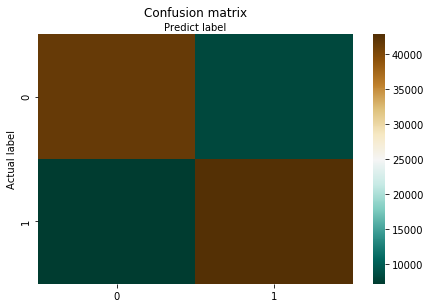

In [23]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap

sns.heatmap(pd.DataFrame(cnf_matrics), cmap='BrBG_r', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predict label')

In [24]:
print('Accuracy:',metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))

Accuracy: 0.844964964964965
Precision: 0.837955889842128
Recall: 0.8556884550764061


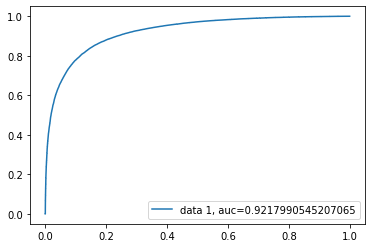

In [26]:
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='data 1, auc='+str(auc))
plt.legend(loc=4)
plt.show()

### Plot calcalution plots

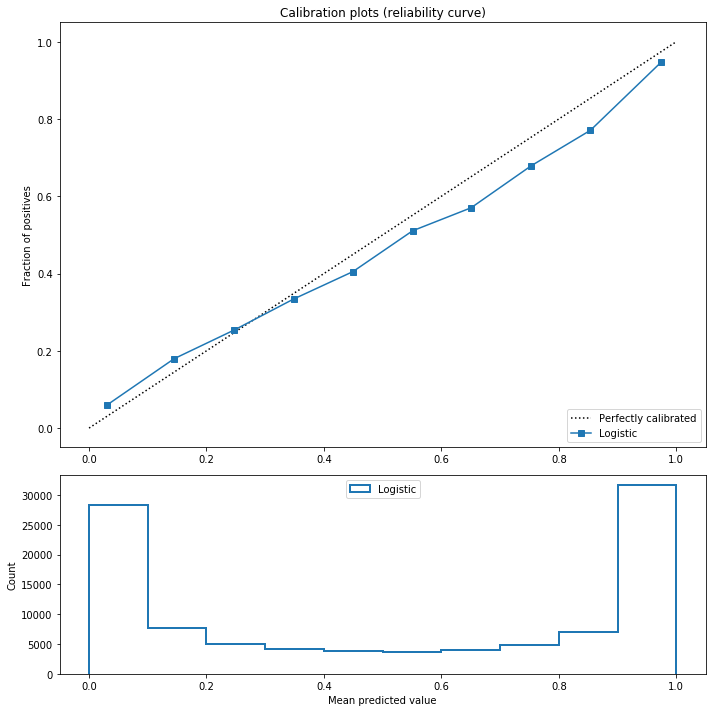

In [27]:
plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')
for clf, name in [(lr, 'Logistic')]:
    clf.fit(X_train, y_train)
    if hasattr(clf, 'predict_proba'):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else: #use decision function
        prob_pos = clf.decision_function(X_test)
        prob_cos = \
        (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
    calibration_curve(y_test, prob_pos, n_bins=10)
    
    ax1.plot(mean_predicted_value, fraction_of_positives, "s-", label="%s" %(name, ))
    
    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name, histtype="step", lw=2)
    
ax1.set_ylabel('Fraction of positives')
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots (reliability curve)')

ax2.set_xlabel('Mean predicted value')
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()